In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris, load_wine

from sklearn.neighbors import KNeighborsClassifier as KNNimport 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris, load_wine

from sklearn.neighbors import KNeighborsClassifier as KNN

/Users/Insui/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
""" Loads our datasets. """
iris = load_iris()
wine = load_wine()

""" Describes our datasets. """
# print(iris.DESCR)
# print(wine.DESCR)

' Describes our datasets. '

In [5]:
""" Create DataFrame objects to hold independent (X) and dependent/target (y) data for Iris dataset. """
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_target = pd.DataFrame(data=iris.target, columns=["iris_type"])
# iris_df.head(5)

""" Check untouched scaling on each column across Iris data. """
# (min(iris_df["sepal length (cm)"]), max(iris_df["sepal length (cm)"]))
# (min(iris_df["sepal width (cm)"]), max(iris_df["sepal width (cm)"]))
# (min(iris_df["petal length (cm)"]), max(iris_df["petal length (cm)"]))
# (min(iris_df["petal width (cm)"]), max(iris_df["petal width (cm)"]))

' Check untouched scaling on each column across Iris data. '

In [21]:
""" Use train_test_split() to fracture data into training and testing samples for Iris data. """
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_target, test_size=0.33)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [22]:
""" Instantiates our algorithm. """
knn = KNN(n_neighbors=5)

""" Fits our training data to the algorithm. """
knn.fit(X_train, y_train)

""" Grabs predictions and calculates accuracy score for model. """
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)
# accuracy_score(y_test, y_pred)

0.97999999999999998

In [16]:
cmat_knn = confusion_matrix(y_pred=y_pred, y_true=y_test)
cmat_knn

array([[18,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 14]])

In [26]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_target = pd.DataFrame(data=wine.target, columns=["wine_type"])

""" Initializes scaler object. """
scaler = StandardScaler()

""" Fits our original data to the scaler object. """
scaler.fit(wine_df)

""" Produces scaled dataset from fitted scaler object. """
scaled_wine = scaler.transform(wine_df)

In [27]:
""" Use train_test_split() to fracture data into training and testing samples for Breast Cancer data. """
X_train, X_test, y_train, y_test = train_test_split(scaled_wine, wine_target, test_size=0.25)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

In [28]:
""" Same as before, let's fit our data to our model, run some predictions, and check the model's accuracy! """
knn = KNN(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.97777777777777775

The optimal number of neighbors is 21.



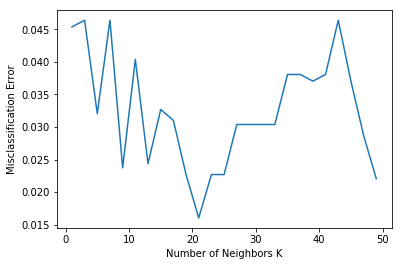

In [29]:
""" Creates list of potential odd k-values. """
k_values = list(range(1, 50))
k_neighbors = list(filter(lambda x: x % 2 != 0, k_values))
cross_val_scores = list()

""" Performs 10-fold cross validation and grabs scores. """
for k in k_neighbors:
    knn = KNN(n_neighbors=k)
    acc_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
    cross_val_scores.append(acc_scores.mean())
    
"""  """
MSE = [1 - x for x in cross_val_scores]

optimal_k = k_neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is {}.\n".format(optimal_k))

plt.plot(k_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()